# Классификатор

## Данные

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

In [117]:
data = pd.read_csv('data.csv', sep='\t')

In [118]:
data.head()

,feat1h,feat1v,feat2,feat3,histh0,histh1,histh2,histh3,histh4,histh5,...,histv6,histv7,histv8,histv9,max_h_stroke_len,n_black,n_h_strokes,n_holes,n_v_strokes,target
0,0.385745,0.036080,3.393293,3.265049,1.695122,0.000000,0.000000,0.00,0.000000,0.000,...,0.095238,0.000000,0.0,0.0,32,3634,584,9,529,True
1,0.162669,0.200926,3.000000,3.521739,0.200000,0.250000,0.750000,0.05,0.250000,0.250,...,0.000000,0.173913,0.0,0.0,16,243,35,2,34,True
2,0.347934,0.040891,3.326316,3.436709,1.300000,0.010526,0.005263,0.00,0.000000,0.000,...,0.062500,0.000000,0.0,0.0,33,2172,319,4,313,True
3,0.340252,0.034888,3.334764,3.566281,1.085837,0.000000,0.000000,0.00,0.000000,0.000,...,0.121212,0.000000,0.0,0.0,40,2771,405,7,372,True
4,0.180441,0.194940,3.166667,3.500000,0.041667,0.041667,0.125000,0.00,0.041667,0.125,...,0.000000,0.000000,0.0,0.0,10,266,44,0,32,True


In [79]:
data['target'] = data['target'].astype('int')

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), 
                                                    data['target'], 
                                                    test_size=0.15, 
                                                    random_state=42,
                                                    shuffle=True)

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36557, 29), (6452, 29), (36557,), (6452,))

## Классификатор

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
clf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=0)

In [92]:
clf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Оценка качетсва

In [129]:
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score

In [94]:
def evaluate(proba, y_true, thresh):
    return accuracy_score((proba[:, 0] < thresh).astype(int), y_true)

In [103]:
probs = clf.predict_proba(X_test)
print('Accuracy: ', evaluate(preds, y_test, 0.5))

Accuracy:  0.9404835709857409


In [104]:
print(clf.feature_importances_)

[0.05696697 0.0276676  0.06157004 0.21642868 0.02925298 0.01394917
 0.01566394 0.00805109 0.00580177 0.01123176 0.00629754 0.00583092
 0.00901702 0.0014866  0.02681261 0.02176195 0.02125346 0.011208
 0.01102734 0.01447886 0.00805414 0.00564795 0.00984244 0.00352251
 0.06215059 0.14076065 0.11413131 0.00830918 0.07182294]


### ROC curve

In [122]:
fpr, tpr, threshold = roc_curve(y_test, probs[:, 1])
precision, recall, thresholds = precision_recall_curve(y_test, probs[:, 1])

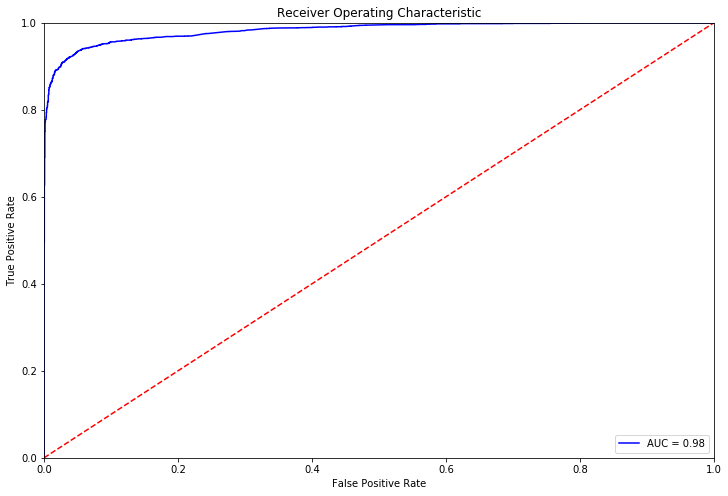

In [123]:
plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

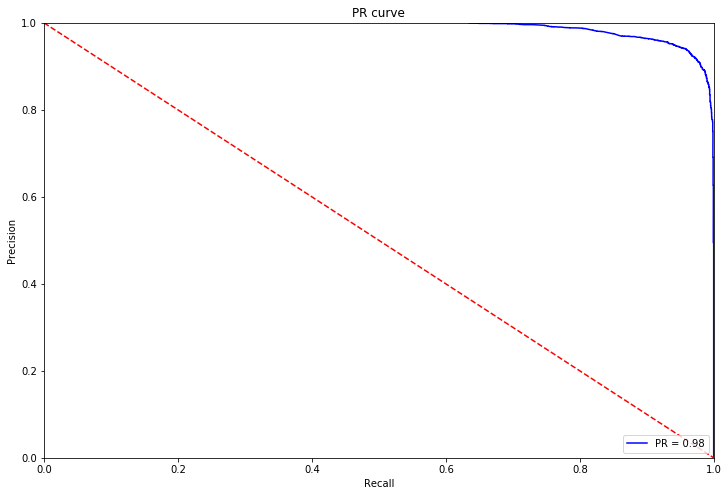

In [125]:
plt.figure(figsize=(12, 8))
plt.title('PR curve')
plt.plot(precision, recall, 'b', label = 'PR = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [1, 0],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

IT'S ALMOST PERFECT

In [132]:
print('ROC AUC:', roc_auc_score(y_test, probs[:, 1]))
print('PR AUC :', average_precision_score(y_test, probs[:, 1])) # = PR AUC

ROC AUC: 0.982867384384014
PR AUC : 0.9892566429996101
